(1294, 100, 100, 3)

(1294, 245)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 85, 85, 32)        24608     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 70, 70, 32)        262176    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1183872   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

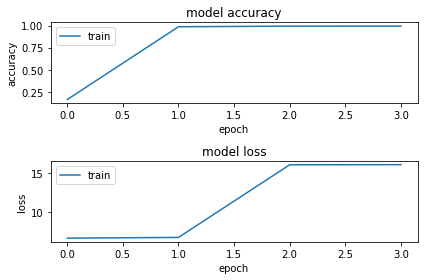

In [11]:
# 1- Process the dataset
# 2- Make the deep neural network
# 3- Train the DNN
# 4- Test the DNN

import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

# First : Processing the dataset

def grab_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

X = np.concatenate([grab_image('/home/jts7n/miscImgs/model/%d_model.png'%(i)) for i in range(1294)])

x_train = X
y_train = np.zeros([1294])

x_train /= 255

# # Convert class vector [0-9] to categorical assignments (one-hot)
y_train = keras.utils.to_categorical(y_train, len(np.unique(x_train)))

display(x_train.shape)
display(y_train.shape)

model = keras.Sequential()
# Note the input size (there is only one channel - intensity)
# these images... if you are using color images, your would
# need to set the last dimension of the input_shape to -3-
# above and this would carry over into this cell...

# Use ‘relu’ as the activation function for the input layer
model.add(keras.layers.Conv2D(32, kernel_size=(16, 16),
                              activation='relu',
                              input_shape=[x_train.shape[1],
                                           x_train.shape[2],
                                           x_train.shape[3]]))

# Use ‘relu’ as the activation function for the hidden layers
model.add(keras.layers.Conv2D(32, (16, 16), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

# Add some dense layer(s)
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# Use ‘linear ’as the activation function for the output layer
model.add(keras.layers.Dense(y_train.shape[1], activation='linear'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

# Third : Train the model

batch_size = 512
epochs = 4
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0)

plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.tight_layout()
plt.show()



### Fourth : Test the model